In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanManuRO/AAD/main/lab%20regresi%C3%B3n%20-20230808/LondonCars2014.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object
 6   Ex Color      9080 non-null   object
 7   In Color      9080 non-null   object
 8   Engine        9080 non-null   object
 9   Transmission  9080 non-null   object
 10  Doors         9080 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 780.4+ KB
None
              Year        Mileage          Price        Doors
count  9080.000000    9080.000000    9080.000000  9080.000000
mean   2010.498018   41875.531057   24410.926652     3.821035
std       2.773451   33146.564303   16300.355339     0.561866
min    1990.000000       1.000000    1490.

/tmp/ipykernel_13572/1369489796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


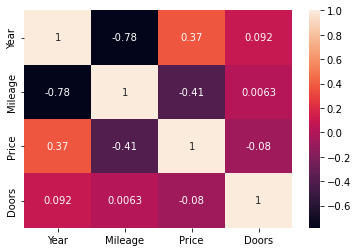

In [5]:
# Grafiquemos la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [6]:
# Volver la variable categórica en numérica, para ver la correlacion con las demás variables
X_categorical = pd.get_dummies(df, columns=['Make', 'Model', 'Body Style', 'Ex Color', 'In Color', 'Transmission', 'Engine'], drop_first=True)
X_categorical.head()

,Year,Mileage,Price,Doors,Make_Aston,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Transmission_Manual,Engine_12 Cyl,Engine_3 Cyl,Engine_4 Cyl,Engine_5 Cyl,Engine_6 Cyl,Engine_8 Cyl,Engine_Electric,Engine_Hybrid,Engine_Rotary
0,2014,4725,28995,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2014,17201,24994,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2014,6279,25998,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2014,16262,26684,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,35572,33440,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
results = pd.DataFrame(columns=['Model', 'Degree', 'MSE Train', 'MSE Val', 'R2 Train', 'R2 Val', 'MAE Train', 'MAE Val'])

X_cuan = df[['Year', 'Mileage', 'Doors']]
y = df['Price']

X_train, X_val, y_train, y_val = train_test_split(X_cuan, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

yPred_train = linear_model.predict(X_train)
yPred_val = linear_model.predict(X_val)

mse_train = mean_squared_error(y_train, yPred_train)
mse_val = mean_squared_error(y_val, yPred_val)

print('MSE train:', mse_train)
print('MSE val:', mse_val)

r2_train = r2_score(y_train, yPred_train)
r2_val = r2_score(y_val, yPred_val)

print('R2 train:', r2_train)
print('R2 val:', r2_val)

mae_train = mean_absolute_error(y_train, yPred_train)
mae_val = mean_absolute_error(y_val, yPred_val)

print('MAE train:', mae_train)
print('MAE val:', mae_val)

results = pd.concat([results, 
                     pd.DataFrame([['Linear Quantitative', 1, mse_train, mse_val, r2_train, r2_val, mae_train, mae_val]], 
                     columns=results.columns)], ignore_index=True)

MSE train: 230735831.99358973
MSE val: 167065978.7200753
R2 train: 0.17355024397195462
R2 val: 0.210481054472635
MAE train: 8318.729048221503
MAE val: 8151.067182541792


In [8]:
X = pd.concat([X_categorical, X_cuan], axis=1)
y = df['Price']

X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model2 = LinearRegression()
linear_model2.fit(X_train2, y_train2)

yPred_train2 = linear_model2.predict(X_train2)
yPred_val2 = linear_model2.predict(X_val2)

mse_train2 = mean_squared_error(y_train2, yPred_train2)
mse_val2 = mean_squared_error(y_val2, yPred_val2)

print('MSE train:', mse_train2)
print('MSE val:', mse_val2)

r2_train2 = r2_score(y_train2, yPred_train2)
r2_val2 = r2_score(y_val2, yPred_val2)

print('R2 train:', r2_train2)
print('R2 val:', r2_val2)

mae_train2 = mean_absolute_error(y_train2, yPred_train2)
mae_val2 = mean_absolute_error(y_val2, yPred_val2)

print('MAE train:', mae_train2)
print('MAE val:', mae_val2)

results = pd.concat([results,
                     pd.DataFrame([['Linear All', 1, mse_train2, mse_val2, r2_train2, r2_val2, mae_train2, mae_val2]], 
                     columns=results.columns)], ignore_index=True)

MSE train: 2.1491401938748665e-22
MSE val: 1.2860189623374035e-20
R2 train: 1.0
R2 val: 1.0
MAE train: 8.222419319081141e-12
MAE val: 1.9157233802239628e-11


In [9]:
# Modelo de regresión polinomial
orders = range(2, 7)

for order in orders:
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())
    poly_model.fit(X_train, y_train)

    yPred_train = poly_model.predict(X_train)
    yPred_val = poly_model.predict(X_val)

    mse_train = mean_squared_error(y_train, yPred_train)
    mse_val = mean_squared_error(y_val, yPred_val)
    print(f'Para el polinomio de orden {order} el MSE train es {mse_train} y el MSE val es {mse_val}')

    r2_train = r2_score(y_train, yPred_train)
    r2_val = r2_score(y_val, yPred_val)
    print(f'Para el polinomio de orden {order} el R2 train es {r2_train} y el R2 val es {r2_val}')

    mae_train = mean_absolute_error(y_train, yPred_train)
    mae_val = mean_absolute_error(y_val, yPred_val)
    print(f'Para el polinomio de orden {order} el MAE train es {mae_train} y el MAE val es {mae_val}\n')

    results = pd.concat([results,
                         pd.DataFrame([['Polynomial Quantitative', order, mse_train, mse_val, r2_train, r2_val, mae_train, mae_val]], 
                         columns=results.columns)], ignore_index=True)

Para el polinomio de orden 2 el MSE train es 223753642.3469144 y el MSE val es 163983107.14187306
Para el polinomio de orden 2 el R2 train es 0.1985590554780785 y el R2 val es 0.22505006209624412
Para el polinomio de orden 2 el MAE train es 8205.1587611852 y el MAE val es 8050.406997773862

Para el polinomio de orden 3 el MSE train es 220240705.03252012 y el MSE val es 163978528.93751815
Para el polinomio de orden 3 el R2 train es 0.2111416966800902 y el R2 val es 0.22507169773446556
Para el polinomio de orden 3 el MAE train es 8155.731883203761 y el MAE val es 8009.3905653461425



Para el polinomio de orden 4 el MSE train es 221337956.77063003 y el MSE val es 164370490.20855787
Para el polinomio de orden 4 el R2 train es 0.20721155967697624 y el R2 val es 0.22321937057743646
Para el polinomio de orden 4 el MAE train es 8177.538080308128 y el MAE val es 8111.9419972843

Para el polinomio de orden 5 el MSE train es 221922032.92185852 y el MSE val es 165506574.29805073
Para el polinomio de orden 5 el R2 train es 0.20511951533122408 y el R2 val es 0.21785047429323423
Para el polinomio de orden 5 el MAE train es 8196.843853027329 y el MAE val es 8136.351016536334

Para el polinomio de orden 6 el MSE train es 221731039.33565536 y el MSE val es 163295545.44074374
Para el polinomio de orden 6 el R2 train es 0.20580361628492827 y el R2 val es 0.228299335188345
Para el polinomio de orden 6 el MAE train es 8173.977091736747 y el MAE val es 8104.414890229696



In [ ]:
# redondear los resultados a 10 decimales
results = results.round(10)
print(results)

In [ ]:
X_train2_sub = X_train2.iloc[:100]
y_train2_sub = y_train2.iloc[:100]

poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train2_sub, y_train2_sub)

yPred_train2 = poly_model.predict(X_train2_sub)
yPred_val2 = poly_model.predict(X_val2)

mse_train2 = mean_squared_error(y_train2_sub, yPred_train2)
mse_val2 = mean_squared_error(y_val2, yPred_val2)
print(f'Para el polinomio de orden {2} el MSE train es {mse_train2} y el MSE val es {mse_val2}')

r2_train2 = r2_score(y_train2_sub, yPred_train2)
r2_val2 = r2_score(y_val2, yPred_val2)
print(f'Para el polinomio de orden {2} el R2 train es {r2_train2} y el R2 val es {r2_val2}')

mae_train2 = mean_absolute_error(y_train2_sub, yPred_train2)
mae_val2 = mean_absolute_error(y_val2, yPred_val2)
print(f'Para el polinomio de orden {2} el MAE train es {mae_train2} y el MAE val es {mae_val2}\n')

In [11]:
from sklearn.linear_model import Ridge, Lasso

results_regul = pd.DataFrame(columns=['Model', 'Alpha', 'MSE_train', 'MSE_val', 'R2_train', 'R2_val', 'MAE_train', 'MAE_val'])

lambdas =[0, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]


for lamb in lambdas:
    # Ridge (L2)
    ridge_model = Ridge(alpha=lamb)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge_train = ridge_model.predict(X_train)
    y_pred_ridge_val = ridge_model.predict(X_val)

    mse_train = mean_squared_error(y_train, y_pred_ridge_train)
    mse_val = mean_squared_error(y_val, y_pred_ridge_val)
    r2_train = r2_score(y_train, y_pred_ridge_train)
    r2_val = r2_score(y_val, y_pred_ridge_val)
    mae_train = mean_absolute_error(y_train, y_pred_ridge_train)
    mae_val = mean_absolute_error(y_val, y_pred_ridge_val)

    results_regul = pd.concat([results_regul,
                                 pd.DataFrame([['Ridge', lamb, mse_train, mse_val, r2_train, r2_val, mae_train, mae_val]], 
                                 columns=results_regul.columns)], ignore_index=True)

results_regul.head(10).round(10)

,Model,Alpha,MSE_train,MSE_val,R2_train,R2_val,MAE_train,MAE_val
0,Ridge,0,2.307358e+08,1.670660e+08,0.17355,0.210481,8318.729048,8151.067183
1,Ridge,0.00001,2.307358e+08,1.670660e+08,0.17355,0.210481,8318.729048,8151.067182
2,Ridge,0.0001,2.307358e+08,1.670660e+08,0.17355,0.210481,8318.729043,8151.067175
3,Ridge,0.001,2.307358e+08,1.670660e+08,0.17355,0.210481,8318.728998,8151.067109
4,Ridge,0.01,2.307358e+08,1.670660e+08,0.17355,0.210481,8318.728547,8151.066446
5,Ridge,0.1,2.307358e+08,1.670659e+08,0.17355,0.210481,8318.724033,8151.059815
6,Ridge,1,2.307358e+08,1.670654e+08,0.17355,0.210484,8318.678914,8150.993534
7,Ridge,10,2.307359e+08,1.670598e+08,0.17355,0.210510,8318.229872,8150.333785
